<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.ticker import ScalarFormatter, PercentFormatter

import seaborn as sns

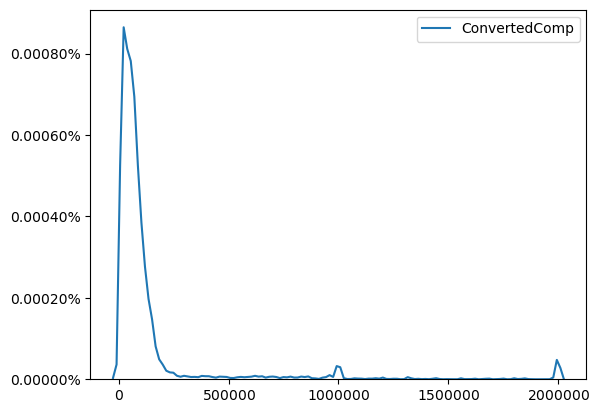

In [4]:
sns.kdeplot(data=df['ConvertedComp'])
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x')
plt.show()

Plot the histogram for the column `ConvertedComp`.


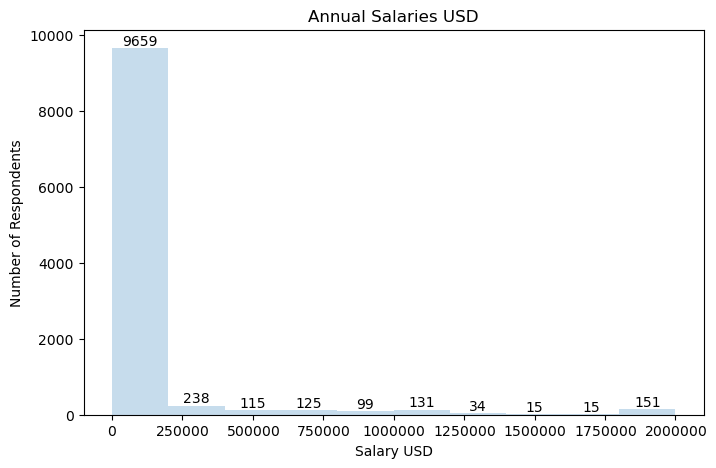

In [5]:
ax = df['ConvertedComp'].plot(kind="hist", alpha=0.25, stacked=False, figsize= (8,5))

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')
    
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='plain', axis='x') 
plt.title("Annual Salaries USD")
plt.ylabel("Number of Respondents")
plt.xlabel("Salary USD")
plt.show()

What is the median of the column `ConvertedComp`?


In [6]:
print("Median ConvertedComp = ", df["ConvertedComp"].median())
print("Median Age = ", df["Age"].median())

Median ConvertedComp =  57745.0
Median Age =  29.0


How many responders identified themselves only as a **Man**?


In [7]:
df["Gender"].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [8]:
df.groupby(['Gender'],as_index=False)['ConvertedComp'].median()

,Gender,ConvertedComp
0,Man,57744.0
1,"Man;Non-binary, genderqueer, or gender non-con...",59520.0
2,"Non-binary, genderqueer, or gender non-conforming",67142.0
3,Woman,57708.0
4,Woman;Man,21648.0
5,"Woman;Man;Non-binary, genderqueer, or gender n...",30244.0
6,"Woman;Non-binary, genderqueer, or gender non-c...",65535.5


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [9]:
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

In [10]:
# Drop NaN values from the 'Age' column
df1 = df[['Age']].dropna()

# Calculate Q1 and Q3 of the Age column data
Q1, Q3 = np.percentile(df1['Age'], [25, 75])

# Calculate the IQR
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Find lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

print("Lower Bound is:", lower_bound)
print("Upper Bound is:", upper_bound)

outliers = np.where((df1 < lower_bound) | (df1 > upper_bound))[0]

print("Outliers:",len(outliers))

# Remove outliers from the cleaned data
cleaned_data = df1[~((df1 < lower_bound) | (df1 > upper_bound))]

Lower Bound is: 10.0
Upper Bound is: 50.0
Outliers: 224


Plot a histogram of the column `Age`.


In [11]:
bins = np.linspace(min(cleaned_data['Age']), max(cleaned_data['Age']), 5)
print(bins)
print(cleaned_data.describe())

[16.  24.5 33.  41.5 50. ]
                Age
count  10887.000000
mean      30.271360
std        6.517779
min       16.000000
25%       25.000000
50%       29.000000
75%       34.000000
max       50.000000


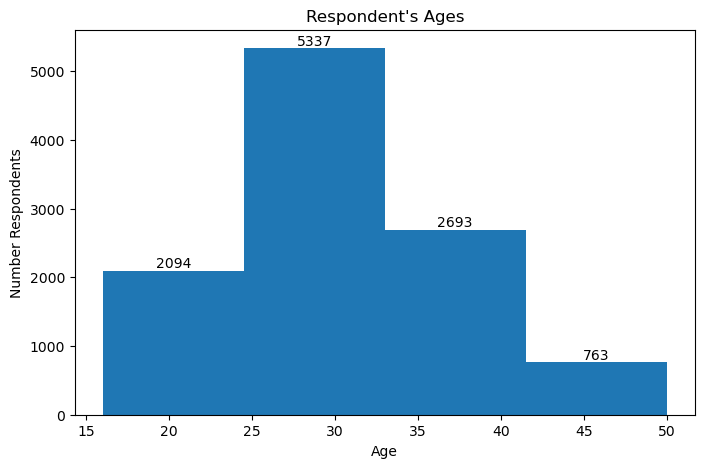

In [12]:
fig, ax = plt.subplots(figsize=(8, 5))
count = ax.hist(cleaned_data['Age'],bins)

for rect in ax.patches:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

ax.set_title("Respondent's Ages") 
ax.set_xlabel('Age')
ax.set_ylabel('Number Respondents')
plt.show()

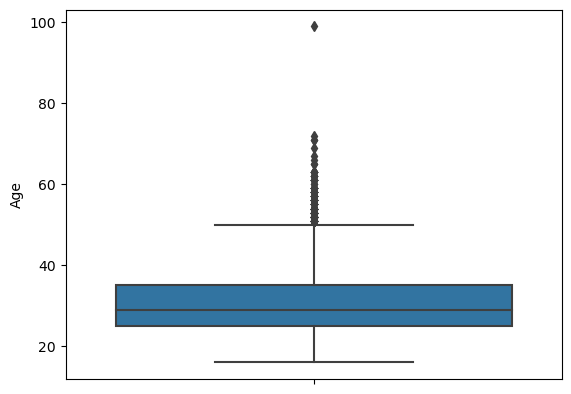

In [13]:
ax = sns.boxplot (y=df['Age'])
plot = sns.set_style("whitegrid")
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


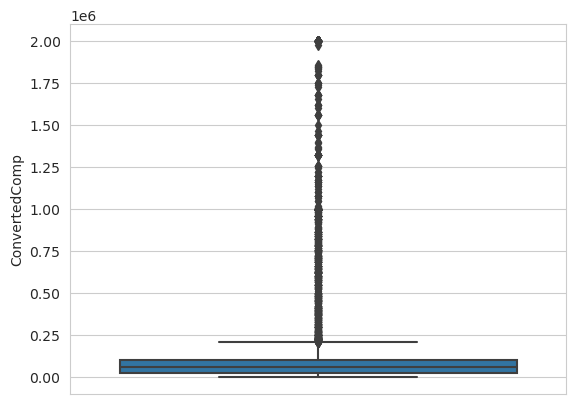

In [14]:
ax = sns.boxplot (y=df ["ConvertedComp"])
plot = sns.set_style("whitegrid")
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
# Drop NaN values from the 'ConvertedComp' column
df2 = df[['ConvertedComp']].dropna()

# Calculate Q1 and Q3 of the ConvertedComp data
Q1, Q3 = np.percentile(df2['ConvertedComp'], [25, 75])

# Calculate the IQR
IQR = Q3 - Q1

print("Q1:", Q1, "Q3:", Q3)


Q1: 26868.0 Q3: 100000.0


Find out the upper and lower bounds.


In [16]:
# Define a threshold for outliers
threshold = 1.5

# Find lower and upper bounds for outliers
lower_bound = max(0, Q1 - threshold * IQR)
upper_bound = Q3 + threshold * IQR

print("Lower Bound is:", lower_bound)
print("Upper Bound is:", upper_bound)

Lower Bound is: 0
Upper Bound is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
outliers = np.where((df2 < lower_bound) | (df2 > upper_bound))[0]

print(len(outliers))

879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
# Remove outliers from the cleaned data
cleaned_data1 = df2[~((df2 < lower_bound) | (df2 > upper_bound))]

print(cleaned_data1.describe())
print("The medeian ConvertedComp after removing outliers is:", cleaned_data1.median())

       ConvertedComp
count    9703.000000
mean    59883.208389
std     43394.336755
min         0.000000
25%     24060.000000
50%     52704.000000
75%     85574.500000
max    209356.000000
The medeian ConvertedComp after removing outliers is: ConvertedComp    52704.0
dtype: float64


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
numerical_columns = df.select_dtypes(include=['number'])
numerical_columns

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
0,4,61000.0,61000.0,80.0,NaN,22.0
1,9,138000.0,95179.0,32.0,12.0,23.0
2,13,90000.0,90000.0,40.0,5.0,28.0
3,16,29000.0,455352.0,40.0,NaN,26.0
4,17,90000.0,65277.0,45.0,5.0,29.0
...,...,...,...,...,...,...
11393,25136,130000.0,130000.0,40.0,NaN,36.0
11394,25137,74400.0,19880.0,40.0,5.0,25.0
11395,25138,105000.0,105000.0,40.0,5.0,34.0
11396,25141,80000.0,80371.0,42.5,2.0,25.0


In [20]:
for param in ["CompTotal","ConvertedComp","WorkWeekHrs","CodeRevHrs"]:
    print("Correlation of Age and {param} is ", df[[param,"Age"]].corr())

Correlation of Age and {param} is             CompTotal      Age
CompTotal    1.00000  0.00697
Age          0.00697  1.00000
Correlation of Age and {param} is                 ConvertedComp       Age
ConvertedComp       1.000000  0.105386
Age                 0.105386  1.000000
Correlation of Age and {param} is               WorkWeekHrs       Age
WorkWeekHrs     1.000000  0.036518
Age             0.036518  1.000000
Correlation of Age and {param} is              CodeRevHrs       Age
CodeRevHrs    1.000000 -0.020469
Age          -0.020469  1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
